# Bank Churn Analysis - AUTO ML

# 2. Imports

## 2.1 Libraries

In [1]:
# utilities
import pickle
import inflection
#from general_utils.GeneralUtils import GeneralUtils
from IPython.display import HTML
from IPython.display import Image
import warnings
#from collections import Counter

# data manipulation
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

# algorithms
from sklearn.dummy import DummyClassifier

## 2.2 Helper Functions

In [2]:
warnings.filterwarnings('ignore')

# sets seaborn default style
sns.set()

# sets matplolit inline
%matplotlib inline

# sets to display unlimited number of columns
pd.options.display.max_columns = 70

# setting the title and axis labels
def set_plots_features(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 40
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    pd.set_option( 'display.expand_frame_repr', False ) 
    pd.options.display.float_format = '{:,.6f}'.format
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


# 3. Data Description

## 3.1 Metadata

The company provided some metadata:

| Variable | Description  | Data Type |
|--|--|--|
| RowNumber | Row number | numerical discrete |
| CustomerID | Unique customer identifier | numerical discrete |
| Surname | Customer's surname | categorical nominal |
| CreditScore | Customer's market credit score | numerical discrete |
| Geography | Customer's local of residence | categorical nominal |
| Gender | Customer's gender | numerical nominal |
| Age | Customer's age | numerical discrete |
| Tenure | Total number of years customer has been an active bank client | numerical discrete |
| Balance | Total customer's bank account balance | numerical continuous |
| NumOfProducts | Total number of products bought by the customer |  numerical discrete |
| HasCrCard | Flag variable - indicates if the customer has a credit card or not | binary |
| IsActiveMember | Flag variable - indicates if the customer made any bank transaction in the last 12 months | binary |
| EstimateSalary | Customer's estimated month salary | numerical continuos |
| Exited | Flag variable - indicates if the customer has churn or not | binary target |

## 3.2 Load Dataset

In [7]:
df = pd.read_csv('../database/churn.csv')
df.head()

# Data source: https://www.kaggle.com/mervetorkan/churndataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000000,1,1,1,"101,348.880000",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.860000",1,0,1,"112,542.580000",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.800000",3,1,0,"113,931.570000",1
3,4,15701354,Boni,699,France,Female,39,1,0.000000,2,0,0,"93,826.630000",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820000",1,1,1,"79,084.100000",0


In [8]:
cols_old = df.columns.to_list()
snakecase = lambda x: inflection.underscore(x)
cols_new = list (map(snakecase,cols_old))
df.columns=cols_new

In [118]:
df_imbalanced = df.copy()
df_imbalanced_preparation =df.copy()

## 3.3 Data Dimension

In [9]:
print ('Number of rows: {}'.format (df.shape[0]))
print ('Number of columns: {}'.format (df.shape[1]))

Number of rows: 10000
Number of columns: 14


## 3.4 Data Types

In [10]:
df.dtypes

row_number          int64  
customer_id         int64  
surname             object 
credit_score        int64  
geography           object 
gender              object 
age                 int64  
tenure              int64  
balance             float64
num_of_products     int64  
has_cr_card         int64  
is_active_member    int64  
estimated_salary    float64
exited              int64  
dtype: object

## 3.5 NA Values

In [11]:
df.isna().sum()

row_number          0
customer_id         0
surname             0
credit_score        0
geography           0
gender              0
age                 0
tenure              0
balance             0
num_of_products     0
has_cr_card         0
is_active_member    0
estimated_salary    0
exited              0
dtype: int64

## 4.2 Feature Engineering

In [119]:
df_imbalanced['tenure_year'] = df['tenure']+1
df_imbalanced['balance_vs_salary'] = df['balance']/df['estimated_salary']
df_imbalanced['tenure_vs_products'] = df['tenure']/df['num_of_products']
df_imbalanced['age_class'] = df['age'].apply(lambda x: 'Young Adult' if x < 30 else ('Adult' if x>=30 and x<50 else ('Middle Age' if x>=50 and x<75 else 'Old')))
df_imbalanced['score_class'] = df['credit_score'].apply(lambda x: 'Bad' if x < 630 else('Fair' if x>=630 and x<690 else ('Good' if x>=690 and x<720 else 'Excelent')))
df_imbalanced['credit_vs_tenure']=df['credit_score']/df_balanced['tenure_year']
df_imbalanced['balance_vs_tenure']=df['balance']/df_balanced['tenure_year']
df_imbalanced['has_product_card']=df['num_of_products']*df['has_cr_card']


df_imbalanced_preparation['tenure_year'] = df['tenure']+1
df_imbalanced_preparation['balance_vs_salary'] = df['balance']/df['estimated_salary']
df_imbalanced_preparation['tenure_vs_products'] = df['tenure']/df['num_of_products']
df_imbalanced_preparation['age_class'] = df['age'].apply(lambda x: 'Young Adult' if x < 30 else ('Adult' if x>=30 and x<50 else ('Middle Age' if x>=50 and x<75 else 'Old')))
df_imbalanced_preparation['score_class'] = df['credit_score'].apply(lambda x: 'Bad' if x < 630 else('Fair' if x>=630 and x<690 else ('Good' if x>=690 and x<720 else 'Excelent')))
df_imbalanced_preparation['credit_vs_tenure']=df['credit_score']/df_balanced['tenure_year']
df_imbalanced_preparation['balance_vs_tenure']=df['balance']/df_balanced['tenure_year']
df_imbalanced_preparation['has_product_card']=df['num_of_products']*df['has_cr_card']

# 5. Filtering Variables

In [120]:
# We are dropping the following columns as they do not add value to the model
drop_columns = ['row_number','customer_id','surname']
df_imbalanced_preparation =df_imbalanced_preparation.drop(columns=drop_columns,axis=1)
df_imbalanced =df_imbalanced.drop(columns=drop_columns,axis=1)

# 7. Data Preparation

## 7.1 Encoding Variables

In [121]:
# geography
df_imbalanced_preparation = pd.get_dummies(df_imbalanced_preparation, columns = ['geography'])

# gender
df_imbalanced_preparation = pd.get_dummies(df_imbalanced_preparation, columns = ['gender'],drop_first=True)

# age_class
from sklearn.preprocessing import OrdinalEncoder
orde = OrdinalEncoder(categories=[['Young Adult','Adult','Middle Age','Old']])
df_imbalanced_preparation['age_class_encod'] = orde.fit_transform(df_imbalanced_preparation[['age_class']]).astype('int')

# score_class
orde2 = OrdinalEncoder(categories=[['Bad','Fair','Good','Excelent']])
df_imbalanced_preparation['score_class_encod'] = orde2.fit_transform(df_imbalanced_preparation[['score_class']]).astype('int')

## 7.3 Scalling Variables

In [86]:
rs = RobustScaler()
mms = MinMaxScaler()
ss =StandardScaler()

### 7.3.2 Imbalanced Dataset

In [125]:
df_imbalanced_preparation['credit_score'] = ss.fit_transform( df_imbalanced_preparation[['credit_score']].values )

df_imbalanced_preparation['num_of_products'] = ss.fit_transform( df_imbalanced_preparation[['num_of_products']].values )

df_imbalanced_preparation['age'] = mms.fit_transform( df_imbalanced_preparation[['age']].values )

df_imbalanced_preparation['tenure'] = mms.fit_transform( df_imbalanced_preparation[['tenure']].values )

df_imbalanced_preparation['balance'] = rs.fit_transform( df_imbalanced_preparation[['balance']].values )

df_imbalanced_preparation['estimated_salary'] = rs.fit_transform( df_imbalanced_preparation[['estimated_salary']].values )

df_imbalanced_preparation['balance_vs_salary'] = rs.fit_transform( df_imbalanced_preparation[['balance_vs_salary']].values )

df_imbalanced_preparation['tenure_vs_products'] = rs.fit_transform( df_imbalanced_preparation[['tenure_vs_products']].values )

df_imbalanced_preparation['tenure'] = mms.fit_transform( df_imbalanced_preparation[['tenure']].values )

df_imbalanced_preparation['balance_vs_tenure'] = rs.fit_transform( df_imbalanced_preparation[['balance_vs_tenure']].values )

# 9. Machine Learning Models

In [102]:
!pip install pycaret
from pycaret.classification import *

 ## 9.2 Imbalanced dataset

### 9.2.1 With Data Preparation

In [137]:
clf = setup(data = df_imbalanced_preparation,
            target = 'exited', 
            numeric_imputation = 'mean', # para tratamento dos missing values
            categorical_features = ['has_cr_card', 'is_active_member','age_class','score_class'], # lista das variáveis categóricas
            session_id = 20111974, # Seed por questões de reproducibilidade
            silent = False)

#By default, 70% of the data will be used for training and validation. The remaining data will be used for a test / hold-out set.

,Description,Value
0,session_id,20111974
1,Target,exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 23)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [138]:
compare_models()
# The output of the function is a table showing the averaged score of all models across the folds.

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8623,0.8697,0.4792,0.7654,0.5880,0.5107,0.5316,0.9260
rf,Random Forest Classifier,0.8613,0.8536,0.4590,0.7752,0.5762,0.4998,0.5245,0.5170
lightgbm,Light Gradient Boosting Machine,0.8608,0.8604,0.5021,0.7386,0.5973,0.5169,0.5312,0.1520
xgboost,Extreme Gradient Boosting,0.8566,0.8445,0.4986,0.7176,0.5882,0.5048,0.5171,1.2360
ada,Ada Boost Classifier,0.8501,0.8491,0.4708,0.7036,0.5628,0.4769,0.4916,0.3140
et,Extra Trees Classifier,0.8448,0.8302,0.4472,0.6909,0.5422,0.4540,0.4700,0.4790
lr,Logistic Regression,0.8343,0.8241,0.3542,0.6900,0.4665,0.3806,0.4109,1.2070
lda,Linear Discriminant Analysis,0.8314,0.8232,0.3625,0.6674,0.4680,0.3786,0.4042,0.0460
ridge,Ridge Classifier,0.8308,0.0000,0.2778,0.7389,0.4022,0.3268,0.3807,0.0370
nb,Naive Bayes,0.8171,0.7924,0.3215,0.6110,0.4194,0.3231,0.3476,0.0550


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=20111974, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [139]:
gbc1  = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8471,0.8433,0.4236,0.7176,0.5328,0.4485,0.4708
1,0.8857,0.9124,0.5556,0.8333,0.6667,0.6010,0.6190
2,0.8543,0.8767,0.4444,0.7442,0.5565,0.4759,0.4985
3,0.8614,0.8615,0.4514,0.7831,0.5727,0.4970,0.5239
4,0.8686,0.8506,0.4722,0.8095,0.5965,0.5244,0.5516
5,0.8629,0.8779,0.4583,0.7857,0.5789,0.5037,0.5299
6,0.8657,0.8892,0.4514,0.8125,0.5804,0.5081,0.5392
7,0.8471,0.8413,0.4722,0.6869,0.5597,0.4710,0.4831
8,0.8643,0.8657,0.5556,0.7207,0.6275,0.5462,0.5531
9,0.8655,0.8779,0.5069,0.7604,0.6083,0.5310,0.5470


### 9.2.2 Without Data Preparation

In [140]:
clf = setup(data = df_imbalanced,
            target = 'exited', 
            numeric_imputation = 'mean', # para tratamento dos missing values
            categorical_features = ['has_cr_card', 'is_active_member'], # lista das variáveis categóricas
            session_id = 20111974, # Seed por questões de reproducibilidade
            silent = False)

#By default, 70% of the data will be used for training and validation. The remaining data will be used for a test / hold-out set.

,Description,Value
0,session_id,20111974
1,Target,exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 19)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [141]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8653,0.8702,0.4993,0.7664,0.6038,0.5270,0.5451,8.9160
rf,Random Forest Classifier,0.8628,0.8553,0.4764,0.7699,0.5877,0.5110,0.5326,0.5670
gbc,Gradient Boosting Classifier,0.8608,0.8689,0.4708,0.7641,0.5812,0.5036,0.5255,0.9540
lightgbm,Light Gradient Boosting Machine,0.8581,0.8581,0.4979,0.7285,0.5912,0.5089,0.5227,0.1750
xgboost,Extreme Gradient Boosting,0.8543,0.8430,0.4993,0.7088,0.5852,0.5000,0.5118,1.3290
ada,Ada Boost Classifier,0.8520,0.8482,0.4764,0.7099,0.5689,0.4840,0.4986,0.2850
et,Extra Trees Classifier,0.8463,0.8332,0.4514,0.6962,0.5466,0.4592,0.4754,0.5400
lda,Linear Discriminant Analysis,0.8405,0.8410,0.3938,0.7012,0.5029,0.4171,0.4423,0.0520
ridge,Ridge Classifier,0.8388,0.0000,0.3181,0.7602,0.4468,0.3710,0.4200,0.0600
dt,Decision Tree Classifier,0.7930,0.6957,0.5306,0.4972,0.5130,0.3818,0.3823,0.0680


In [143]:
cat1  = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8429,0.8462,0.4306,0.6889,0.5299,0.4415,0.4591
1,0.8943,0.9072,0.5556,0.8889,0.6838,0.6243,0.6492
2,0.8600,0.8747,0.4653,0.7614,0.5776,0.4995,0.5212
3,0.8643,0.8743,0.4861,0.7692,0.5957,0.5191,0.5389
4,0.8614,0.8457,0.4861,0.7527,0.5907,0.5119,0.5297
5,0.8700,0.8835,0.4931,0.7978,0.6094,0.5366,0.5590
6,0.8729,0.8936,0.4861,0.8235,0.6114,0.5413,0.5682
7,0.8400,0.8389,0.4792,0.6509,0.5520,0.4573,0.4653
8,0.8757,0.8628,0.5694,0.7664,0.6534,0.5797,0.5892
9,0.8712,0.8754,0.5417,0.7647,0.6341,0.5588,0.5710


 ## 9.3 Imbalanced dataset with balance by Pycaret


### 9.3.1 With Data Preparation

In [144]:
clf = setup(data = df_imbalanced_preparation,
            target = 'exited', 
            numeric_imputation = 'mean', # para tratamento dos missing values
            categorical_features = ['has_cr_card', 'is_active_member','age_class','score_class'], # lista das variáveis categóricas
            session_id = 20111974, # Seed por questões de reproducibilidade
            silent = False,
            fix_imbalance=True)

,Description,Value
0,session_id,20111974
1,Target,exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 23)"
5,Missing Values,False
6,Numeric Features,16
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [145]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8596,0.8662,0.5451,0.7064,0.6150,0.5309,0.5378,24.2390
lightgbm,Light Gradient Boosting Machine,0.8553,0.8600,0.5333,0.6926,0.6022,0.5156,0.5225,0.3120
gbc,Gradient Boosting Classifier,0.8527,0.8639,0.5521,0.6736,0.6060,0.5167,0.5210,1.9480
rf,Random Forest Classifier,0.8518,0.8526,0.5236,0.6838,0.5923,0.5038,0.5110,0.8140
xgboost,Extreme Gradient Boosting,0.8484,0.8430,0.5229,0.6694,0.5866,0.4956,0.5016,2.0160
et,Extra Trees Classifier,0.8378,0.8289,0.4875,0.6408,0.5526,0.4560,0.4629,0.7010
ada,Ada Boost Classifier,0.8340,0.8432,0.5583,0.6054,0.5801,0.4769,0.4781,0.5700
nb,Naive Bayes,0.8234,0.7917,0.3764,0.6203,0.4653,0.3676,0.3856,0.0630
lda,Linear Discriminant Analysis,0.8153,0.8188,0.5139,0.5561,0.5336,0.4188,0.4196,0.0960
ridge,Ridge Classifier,0.8150,0.0000,0.5139,0.5553,0.5332,0.4181,0.4190,0.0610


In [147]:
cat2 = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8443,0.8377,0.4653,0.6768,0.5514,0.4611,0.4730
1,0.8814,0.8998,0.5903,0.7798,0.6719,0.6013,0.6099
2,0.8471,0.8661,0.5139,0.6667,0.5804,0.4888,0.4950
3,0.8629,0.8706,0.5486,0.7182,0.6220,0.5401,0.5474
4,0.8643,0.8480,0.5556,0.7207,0.6275,0.5462,0.5531
5,0.8714,0.8868,0.5694,0.7455,0.6457,0.5688,0.5765
6,0.8729,0.8827,0.5625,0.7570,0.6454,0.5700,0.5793
7,0.8357,0.8412,0.5278,0.6179,0.5693,0.4686,0.4708
8,0.8557,0.8591,0.5486,0.6870,0.6100,0.5229,0.5279
9,0.8598,0.8696,0.5694,0.6949,0.6260,0.5407,0.5448


In [152]:
cat2_tuned = tune_model(cat2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.8484,0.4722,0.7010,0.5643,0.4778,0.4915
1,0.8886,0.9065,0.5833,0.8235,0.6829,0.6177,0.6312
2,0.8529,0.8785,0.4792,0.7113,0.5726,0.4878,0.5017
3,0.8671,0.8748,0.5000,0.7742,0.6076,0.5320,0.5505
4,0.8629,0.8586,0.5208,0.7353,0.6098,0.5295,0.5411
5,0.8643,0.8852,0.5139,0.7475,0.6091,0.5303,0.5440
6,0.8657,0.8963,0.4792,0.7841,0.5948,0.5199,0.5426
7,0.8371,0.8437,0.5000,0.6316,0.5581,0.4600,0.4647
8,0.8657,0.8710,0.5625,0.7232,0.6328,0.5522,0.5587
9,0.8727,0.8754,0.5694,0.7523,0.6482,0.5723,0.5806


### 9.3.2 Without Data Preparation

In [148]:
clf = setup(data = df_imbalanced,
            target = 'exited', 
            numeric_imputation = 'mean', # para tratamento dos missing values
            categorical_features = ['has_cr_card', 'is_active_member'], # lista das variáveis categóricas
            session_id = 20111974, # Seed por questões de reproducibilidade
            silent = False,
            fix_imbalance=True)

,Description,Value
0,session_id,20111974
1,Target,exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 19)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [149]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8620,0.8663,0.5153,0.7359,0.6055,0.5251,0.5377,25.9070
lightgbm,Light Gradient Boosting Machine,0.8596,0.8613,0.5167,0.7224,0.6016,0.5193,0.5305,0.2150
gbc,Gradient Boosting Classifier,0.8594,0.8679,0.5264,0.7168,0.6059,0.5229,0.5328,2.1910
rf,Random Forest Classifier,0.8584,0.8541,0.4958,0.7305,0.5895,0.5079,0.5225,0.7770
xgboost,Extreme Gradient Boosting,0.8538,0.8468,0.5181,0.6961,0.5935,0.5067,0.5153,1.5690
et,Extra Trees Classifier,0.8461,0.8359,0.4840,0.6775,0.5638,0.4736,0.4840,0.6620
ada,Ada Boost Classifier,0.8447,0.8523,0.5306,0.6508,0.5833,0.4893,0.4939,0.6290
dt,Decision Tree Classifier,0.7933,0.6954,0.5292,0.4999,0.5135,0.3826,0.3832,0.1270
nb,Naive Bayes,0.7745,0.7473,0.3021,0.4377,0.3461,0.2195,0.2304,0.0600
lda,Linear Discriminant Analysis,0.7741,0.8426,0.7576,0.4700,0.5798,0.4368,0.4604,0.0920


In [150]:
cat3=create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8386,0.8397,0.4306,0.6667,0.5232,0.4314,0.4464
1,0.8843,0.8984,0.5625,0.8182,0.6667,0.5995,0.6150
2,0.8500,0.8695,0.4792,0.6970,0.5679,0.4809,0.4933
3,0.8671,0.8697,0.5139,0.7629,0.6141,0.5375,0.5528
4,0.8600,0.8471,0.5208,0.7212,0.6048,0.5224,0.5327
5,0.8686,0.8850,0.5069,0.7766,0.6134,0.5384,0.5562
6,0.8714,0.8912,0.5139,0.7872,0.6218,0.5485,0.5666
7,0.8429,0.8357,0.5069,0.6518,0.5703,0.4760,0.4816
8,0.8686,0.8569,0.5556,0.7407,0.6349,0.5568,0.5653
9,0.8684,0.8693,0.5625,0.7364,0.6378,0.5591,0.5667


In [151]:
tuned_lightgbm = tune_model(cat3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8500,0.8484,0.4722,0.7010,0.5643,0.4778,0.4915
1,0.8886,0.9065,0.5833,0.8235,0.6829,0.6177,0.6312
2,0.8529,0.8785,0.4792,0.7113,0.5726,0.4878,0.5017
3,0.8671,0.8748,0.5000,0.7742,0.6076,0.5320,0.5505
4,0.8629,0.8586,0.5208,0.7353,0.6098,0.5295,0.5411
5,0.8643,0.8852,0.5139,0.7475,0.6091,0.5303,0.5440
6,0.8657,0.8963,0.4792,0.7841,0.5948,0.5199,0.5426
7,0.8371,0.8437,0.5000,0.6316,0.5581,0.4600,0.4647
8,0.8657,0.8710,0.5625,0.7232,0.6328,0.5522,0.5587
9,0.8727,0.8754,0.5694,0.7523,0.6482,0.5723,0.5806


## Evaluate Models

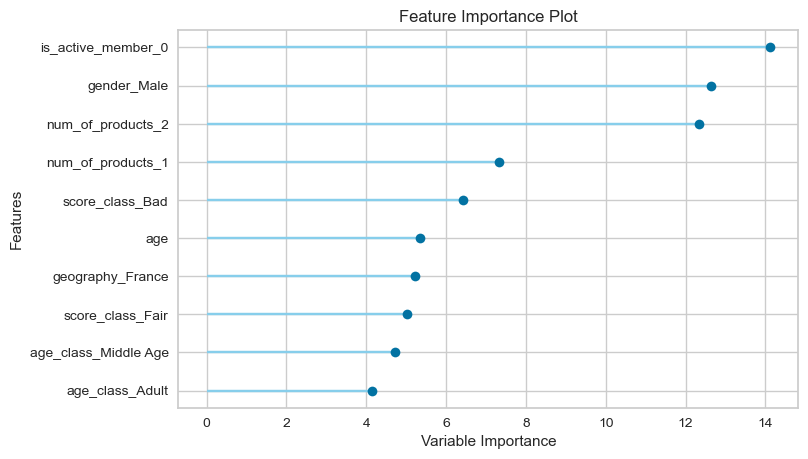

In [153]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

# 11. Model and Business Performance

## 11.1 Model Performance

### 11.1.1 Precision Recall

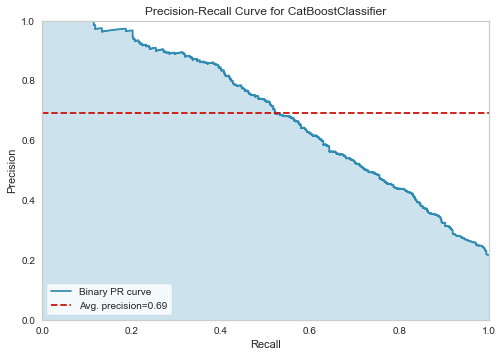

In [159]:
plot_model(estimator = tuned_lightgbm, plot = 'pr')

### 11.1.2 ROC curve

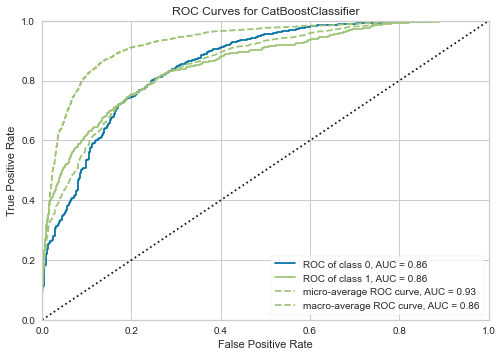

In [154]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')